<a href="https://colab.research.google.com/github/AjanakuBen/Kaggle-Data-Science-Projects/blob/main/Titanic_Basic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARIES FOR DATA EXPLORATION**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**IMPORT LIBRARIES FOR MACHINE LEARNING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler

**LOAD DATASET**

In [ ]:
df = pd.read_csv('/content/train.csv')

**EXPLORATORY DATA ANALYSIS**

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
884,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
885,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
887,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
888,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.shape

(889, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.select_dtypes(include = {int, float}).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
df_cat = df.select_dtypes(exclude = {int, float}).columns
df_cat

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,889.000000,889.000000,889.000000,889,889,712.000000,889.000000,889.000000,889,889.000000,202,889
unique,NaN,NaN,NaN,889,2,NaN,NaN,NaN,680,NaN,146,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.382452,2.311586,NaN,NaN,29.642093,0.524184,0.382452,NaN,32.096681,NaN,NaN
std,256.998173,0.486260,0.834700,NaN,NaN,14.492933,1.103705,0.806761,NaN,49.697504,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,224.000000,0.000000,2.000000,NaN,NaN,20.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.000000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**DATA VISUALIZATION**

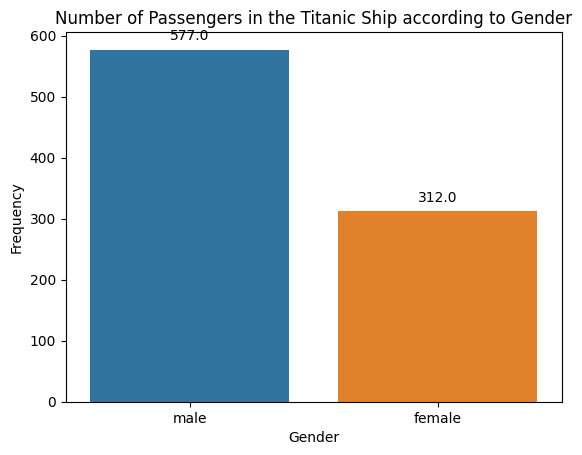

In [ ]:
ax= sns.countplot(x='Sex', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Number of Passengers in the Titanic Ship according to Gender')
plt.show()

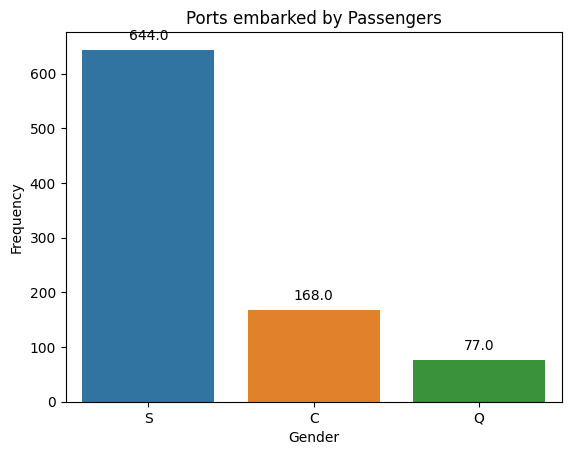

In [ ]:
ax = sns.countplot(x='Embarked', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Ports embarked by Passengers')
plt.show()

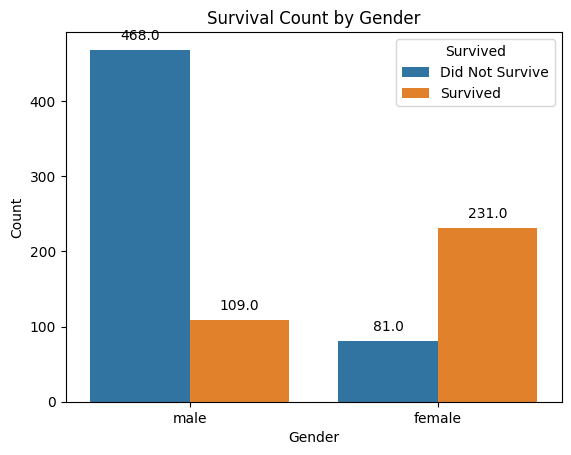

In [ ]:
ax = sns.countplot(x='Sex', hue='Survived', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survival Count by Gender')
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.show()

**DATA PREPROCESSING**

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
df['Age'].fillna(round(df['Age'].median(), 2), inplace = True)

In [ ]:
df.drop(columns = ['Name', 'Ticket', 'Cabin'], inplace = True)

In [ ]:
df.isna().sum().sum()

0

In [ ]:
label_encoder = LabelEncoder()
df['Embarked coded'] = label_encoder.fit_transform(df['Embarked'])
df['Sex coded'] = label_encoder.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked coded,Sex coded
0,1,0,3,male,22.0,1,0,7.2500,S,2,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,2,0
3,4,1,1,female,35.0,1,0,53.1000,S,2,0
4,5,0,3,male,35.0,0,0,8.0500,S,2,1


In [ ]:
df.drop(columns = ['Embarked', 'Sex'], inplace = True)

**DATA MODELLING**

In [ ]:
minmax_scaler = MinMaxScaler()
pd.DataFrame(minmax_scaler.fit_transform(df), columns=df.columns)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked coded,Sex coded
0,0.000000,0.0,1.0,0.271174,0.125,0.000000,0.014151,1.0,1.0
1,0.001124,1.0,0.0,0.472229,0.125,0.000000,0.139136,0.0,0.0
2,0.002247,1.0,1.0,0.321438,0.000,0.000000,0.015469,1.0,0.0
3,0.003371,1.0,0.0,0.434531,0.125,0.000000,0.103644,1.0,0.0
4,0.004494,0.0,1.0,0.434531,0.000,0.000000,0.015713,1.0,1.0
...,...,...,...,...,...,...,...,...,...
884,0.995506,0.0,0.5,0.334004,0.000,0.000000,0.025374,1.0,1.0
885,0.996629,1.0,0.0,0.233476,0.000,0.000000,0.058556,1.0,0.0
886,0.997753,0.0,1.0,0.346569,0.125,0.333333,0.045771,1.0,0.0
887,0.998876,1.0,0.0,0.321438,0.000,0.000000,0.058556,0.0,1.0


In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked coded,Sex coded
PassengerId,1.000000,-0.005028,-0.035330,0.031319,-0.057686,-0.001657,0.012703,0.013166,0.043136
Survived,-0.005028,1.000000,-0.335549,-0.069822,-0.034040,0.083151,0.255290,-0.169718,-0.541585
Pclass,-0.035330,-0.335549,1.000000,-0.336512,0.081656,0.016824,-0.548193,0.164681,0.127741
Age,0.031319,-0.069822,-0.336512,1.000000,-0.232543,-0.171485,0.093707,-0.020933,0.086506
SibSp,-0.057686,-0.034040,0.081656,-0.232543,1.000000,0.414542,0.160887,0.068900,-0.116348
Parch,-0.001657,0.083151,0.016824,-0.171485,0.414542,1.000000,0.217532,0.040449,-0.247508
Fare,0.012703,0.255290,-0.548193,0.093707,0.160887,0.217532,1.000000,-0.226311,-0.179958
Embarked coded,0.013166,-0.169718,0.164681,-0.020933,0.068900,0.040449,-0.226311,1.000000,0.110320
Sex coded,0.043136,-0.541585,0.127741,0.086506,-0.116348,-0.247508,-0.179958,0.110320,1.000000


In [ ]:
df.corr()['Survived'].sort_values(ascending = False)

Survived          1.000000
Fare              0.255290
Parch             0.083151
PassengerId      -0.005028
SibSp            -0.034040
Age              -0.069822
Embarked coded   -0.169718
Pclass           -0.335549
Sex coded        -0.541585
Name: Survived, dtype: float64

In [ ]:
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked coded', 'Sex coded']]
y = df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred_log = model1.predict(X_test)
y_pred_log

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1])

In [ ]:
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
classification_report_str = classification_report(y_test, y_pred_log)
accuracy

0.7752808988764045

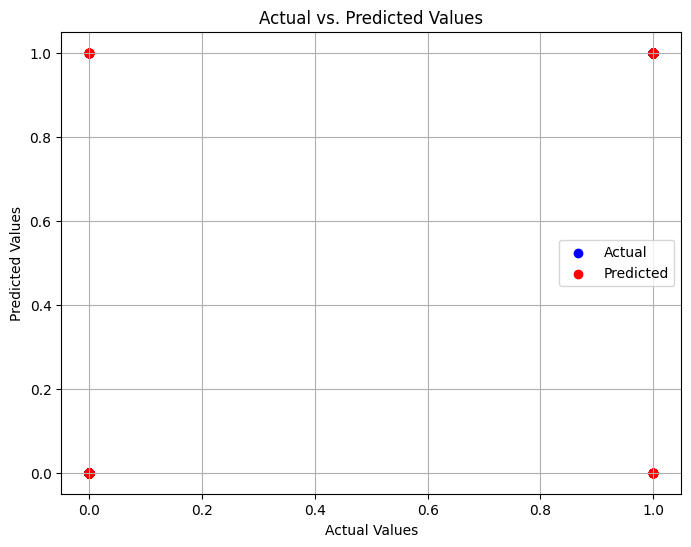

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', label='Actual')
plt.scatter(y_test, y_pred_log, c='red', label='Predicted')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(loc='best')
plt.grid(True)
plt.show()

**RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_for = rf_classifier.predict(X_test)
y_pred_for

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1])

In [ ]:
accuracy = accuracy_score(y_test, y_pred_for)
accuracy

0.7584269662921348

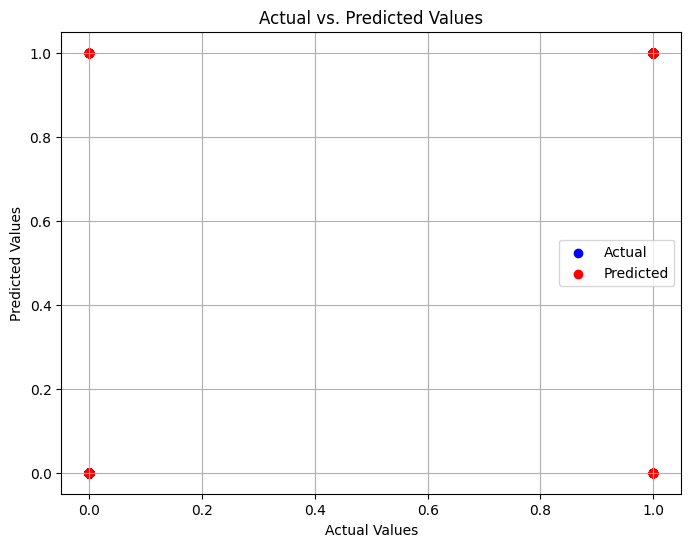

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', label='Actual')
plt.scatter(y_test, y_pred_for, c='red', label='Predicted')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(loc='best')
plt.grid(True)
plt.show()

**SUPPORT VECTOR MACHINE**

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
y_pred_svm

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1])

In [ ]:
accuracy = accuracy_score(y_test, y_pred_svm)
accuracy

0.797752808988764

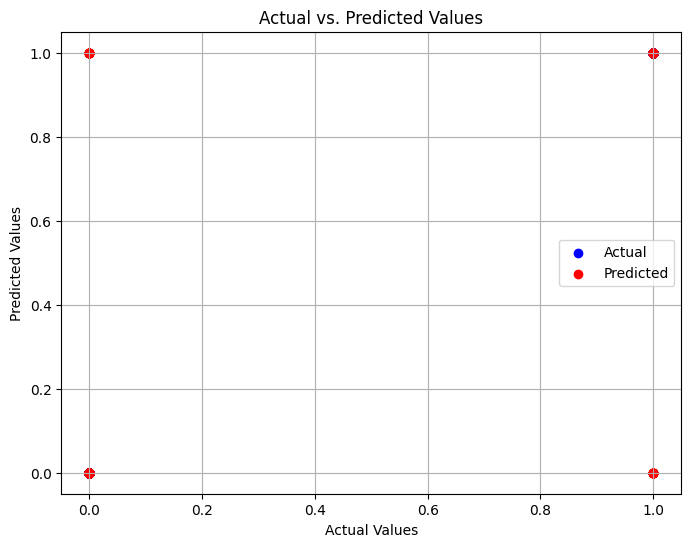

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', label='Actual')
plt.scatter(y_test, y_pred_svm, c='red', label='Predicted')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(loc='best')
plt.grid(True)
plt.show()

**NEW DATASET FOR PREDICTION USING ALREADY BUILT MODELS USING LOGISTIC REGRESSION**

In [ ]:
df1 = pd.read_csv('/content/test.csv')

In [ ]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df1.drop(columns = ['Name', 'Ticket', 'Cabin'], inplace = True)

In [ ]:
label_encoder = LabelEncoder()
df1['Embarked coded'] = label_encoder.fit_transform(df1['Embarked'])
df1['Sex coded'] = label_encoder.fit_transform(df1['Sex'])
df1.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked coded,Sex coded
0,892,3,male,34.5,0,0,7.8292,Q,1,1
1,893,3,female,47.0,1,0,7.0000,S,2,0
2,894,2,male,62.0,0,0,9.6875,Q,1,1
3,895,3,male,27.0,0,0,8.6625,S,2,1
4,896,3,female,22.0,1,1,12.2875,S,2,0


In [ ]:
df1.drop(columns = ['Sex', 'Embarked'], inplace = True)

In [ ]:
df1.drop(columns = ['PassengerId'], inplace = True)

In [ ]:
df1.isna().sum()

Pclass             0
Age               86
SibSp              0
Parch              0
Fare               1
Embarked coded     0
Sex coded          0
dtype: int64

In [ ]:
df1['Age'].fillna(round(df1['Age'].median(), 0), inplace = True)
df1['Fare'].fillna(round(df1['Fare'].mean(), 2), inplace = True)

In [ ]:
predictions = model1.predict(df1)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,